# Deeplearning Summer School 2020 - Final Project Group 4

## Imports

In [23]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.utils import plot_model

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


## Inspect directory

In [22]:
directory = 'C:/Users/jonad/deeplearning/dataset'
print(os.listdir(directory))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg', 'cat.1007.jpg', 'cat.1008.jpg', 'cat.1009.jpg', 'cat.101.jpg', 'cat.1010.jpg', 'cat.1011.jpg', 'cat.1012.jpg', 'cat.1013.jpg', 'cat.1014.jpg', 'cat.1015.jpg', 'cat.1016.jpg', 'cat.1017.jpg', 'cat.1018.jpg', 'cat.1019.jpg', 'cat.102.jpg', 'cat.1020.jpg', 'cat.1021.jpg', 'cat.1022.jpg', 'cat.1023.jpg', 'cat.1024.jpg', 'cat.1025.jpg', 'cat.1026.jpg', 'cat.1027.jpg', 'cat.1028.jpg', 'cat.1029.jpg', 'cat.103.jpg', 'cat.1030.jpg', 'cat.1031.jpg', 'cat.1032.jpg', 'cat.1033.jpg', 'cat.1034.jpg', 'cat.1035.jpg', 'cat.1036.jpg', 'cat.1037.jpg', 'cat.1038.jpg', 'cat.1039.jpg', 'cat.104.jpg', 'cat.1040.jpg', 'cat.1041.jpg', 'cat.1042.jpg', 'cat.1043.jpg', 'cat.1044.jpg', 'cat.1045.jpg', 'cat.1046.jpg', 'cat.1047.jpg', 'cat.1048.jpg', 'cat.1049.jpg', 'cat.105.jpg', 'cat.1050.jpg', 'cat.1051.jpg', 'cat.1052.jpg', 'cat.1053.jpg', 'cat.

In [3]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

## Loading dataset into dataframes 

In [4]:
filenames = os.listdir(directory)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


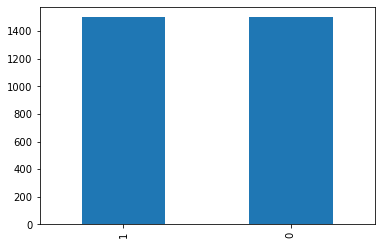

In [5]:
df['category'].value_counts().plot.bar()

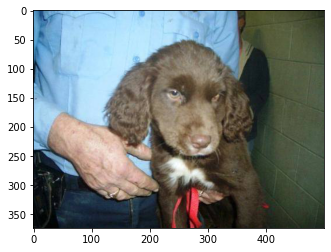

In [6]:
sample = random.choice(filenames)
image = load_img(directory+"/"+sample)
plt.imshow(image)

## Model Architecture 

In [7]:
#MODEL1

def define_model(struct):
    
    if struct == "cnn":  
        inputs = keras.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))

        x = Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))(inputs)
        x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        x = Conv2D(64, (3, 3), activation='relu')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        x = Conv2D(128, (3, 3), activation='relu')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        x = Flatten()(x)
        x = Dense(512, activation='relu')(x)
        x = Dense(512, activation='relu')(x)

        x = BatchNormalization()(x)
        x = Dropout(0.25)(x)
        x = outputs = Dense(2, activation='softmax')(x) # 2 because we have cat and dog classes

        model = keras.Model(inputs, outputs)

        model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

        model.summary()
    
    if struct == "resnet": 
        inputs = keras.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))
    
        x = Conv2D(64, (7, 7), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))(inputs)

        x_temp = x
        x = Conv2D(64, (3, 3), padding = "same",  activation='relu')(x)
        x = Conv2D(64, (3, 3), padding = "same",  activation='relu')(x)
        x = Add()([x, x_temp])
        x = Conv2D(64, (3, 3), padding = "same",  activation='relu')(x)
        x = Conv2D(64, (3, 3), padding = "same",  activation='relu')(x)
        x = Add()([x, x_temp])
        x = Conv2D(64, (3, 3), padding = "same",  activation='relu')(x)
        x = Conv2D(64, (3, 3), padding = "same",  activation='relu')(x)
        x = Add()([x, x_temp])
        x = Conv2D(64, (3, 3), padding = "same",  activation='relu')(x)
        x = Conv2D(64, (3, 3), padding = "same",  activation='relu')(x)

        x = MaxPooling2D(pool_size=(5, 5))(x)

        x = Flatten()(x)
        x = Dense(512, activation='relu')(x)
        x = outputs = Dense(2, activation='softmax')(x) # 2 because we have cat and dog classes

        model = keras.Model(inputs, outputs)

        model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

        model.summary()
        
    
    return model

In [8]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [9]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [10]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

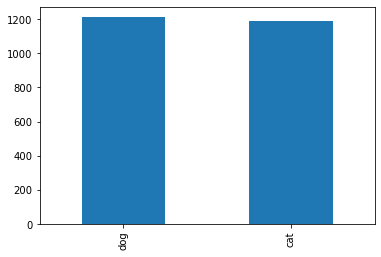

In [11]:
train_df['category'].value_counts().plot.bar()

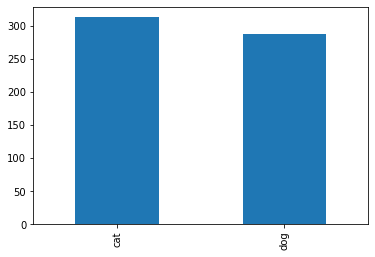

In [12]:
validate_df['category'].value_counts().plot.bar()

In [13]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=5

In [14]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    directory, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    directory, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2400 validated image filenames belonging to 2 classes.
Found 600 validated image filenames belonging to 2 classes.


In [15]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    directory, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


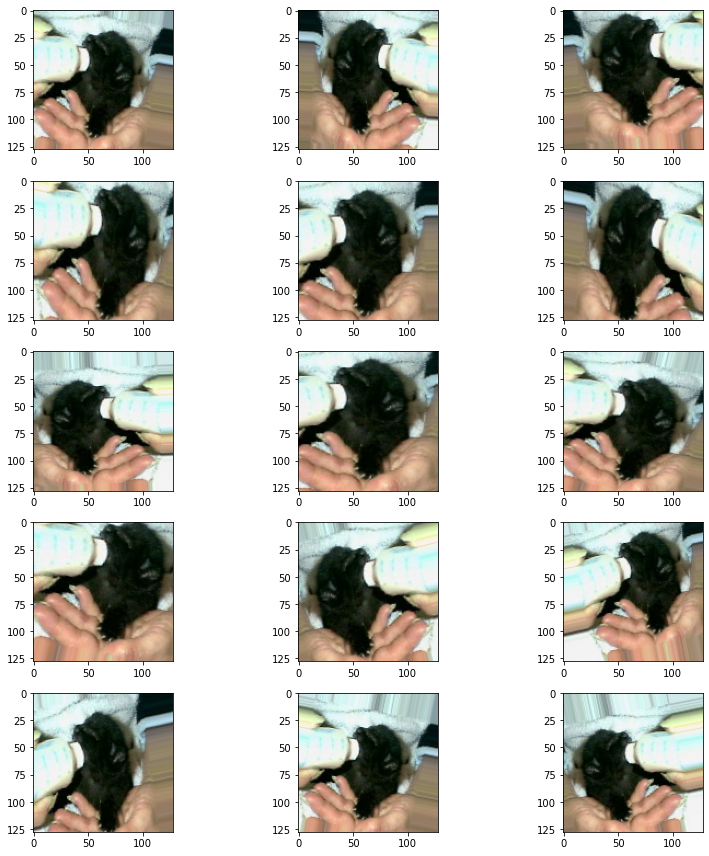

In [16]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [17]:
epochs = 3
model = define_model("cnn")

history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)       

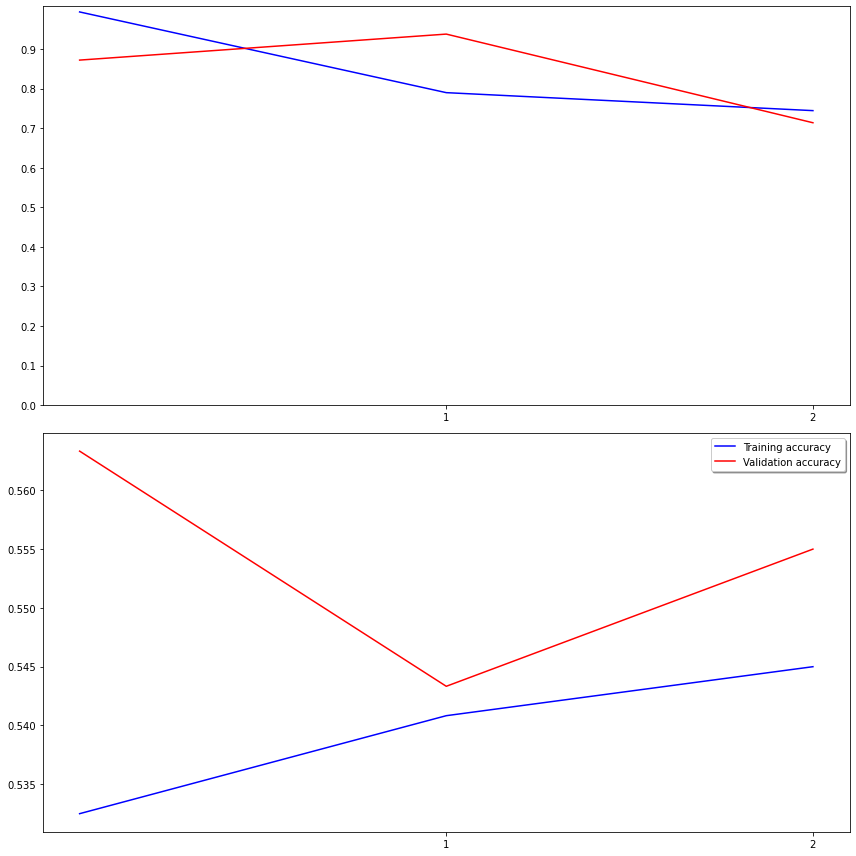

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [19]:
# predicting images
img = keras.preprocessing.image.load_img("C:/Users/jonad/deeplearning/testdog.jpg", target_size=(128, 128))
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print("Probabilities:",classes)

if (np.argmax(classes,axis=1)[0] == 1):
    print("DOG!")
if (np.argmax(classes,axis=1)[0] == 0):
    print("CAT!")

Probabilities: [[0. 1.]]
DOG!


In [20]:
history.history

{'loss': [0.9938173294067383, 0.7898565530776978, 0.7444266080856323],
 'accuracy': [0.5325000286102295, 0.5408333539962769, 0.5450000166893005],
 'val_loss': [0.872117817401886, 0.9378266334533691, 0.713788628578186],
 'val_accuracy': [0.5633333325386047, 0.5433333516120911, 0.5550000071525574],
 'lr': [0.001, 0.001, 0.001]}

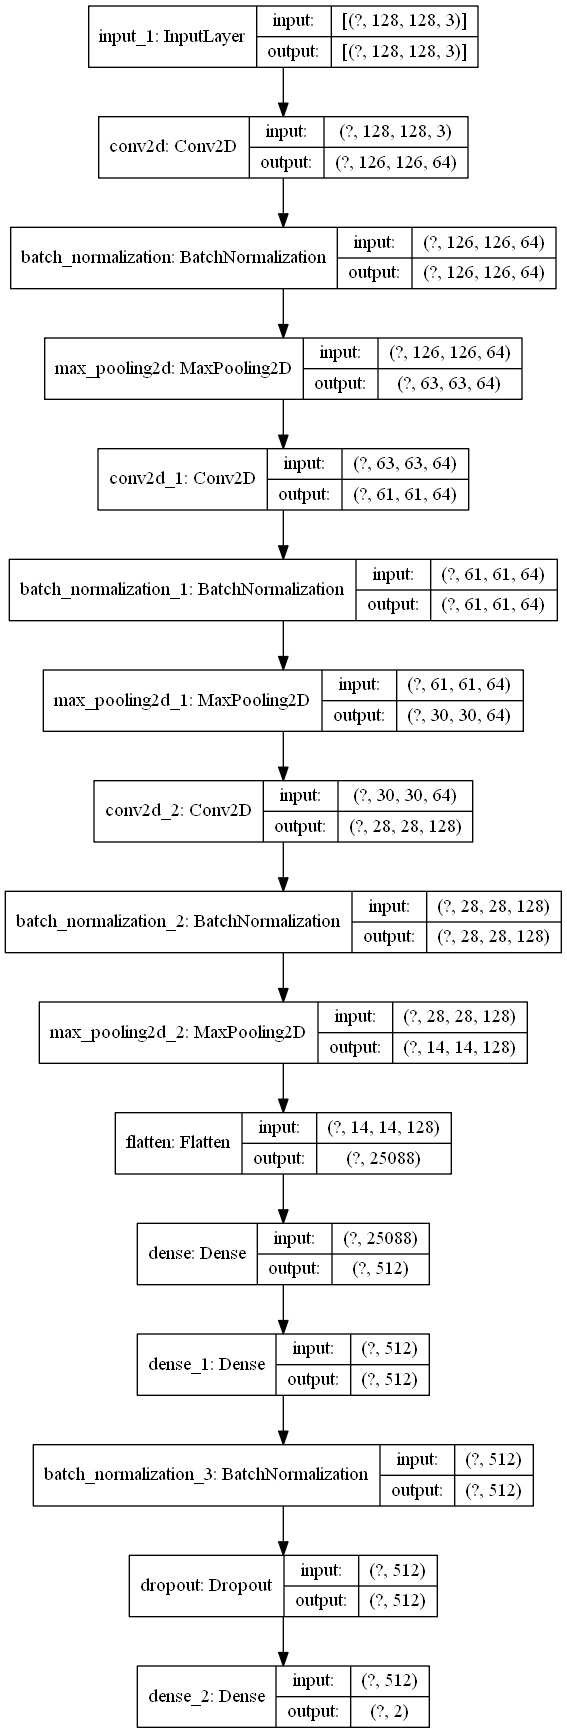

In [21]:

plot_model(model, to_file='rnn.png' ,show_shapes=True, show_layer_names=True)